In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl 
import re

In [4]:
dfp=pd.read_csv("listingsPorto.csv")
dfa=pd.read_csv("listingsAmsterdam.csv")

***AMSTERDAM***

In [5]:
dfa.head(5)
dfa.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [6]:
#Se eliminan los valores nulos
dfa.isnull().sum()
dfa=dfa.fillna(method='ffill')
dfa=dfa.fillna(method='bfill')

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/1736785499.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfa=dfa.fillna(method='ffill')
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/1736785499.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfa=dfa.fillna(method='bfill')


In [7]:
#Como no funciono el bfill y ffill usamos el metodo de sustituir por una palabra 
dfa1=dfa.fillna('nulos')
dfa1.info()
dfa1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9310 non-null   int64  
 1   listing_url                                   9310 non-null   object 
 2   scrape_id                                     9310 non-null   int64  
 3   last_scraped                                  9310 non-null   object 
 4   source                                        9310 non-null   object 
 5   name                                          9310 non-null   object 
 6   description                                   9310 non-null   object 
 7   neighborhood_overview                         9310 non-null   object 
 8   picture_url                                   9310 non-null   object 
 9   host_id                                       9310 non-null   i

0

In [8]:
#Se separan las columnas por cualitativas y cuantitativas
numcol=dfa1.select_dtypes(include=['number'])
catcolsinfiltrar=dfa1.select_dtypes(include=['object'])

In [9]:
#Se seleccionan las variables solicitadas 
catcol=catcolsinfiltrar[['host_response_time','host_acceptance_rate','property_type','room_type','amenities','host_is_superhost']]

In [10]:
#Se procesan los datos nulos de las varibales numericas 
numcol.isnull().sum().sum()
numcol=numcol.fillna(method='ffill')
numcol=numcol.fillna(method='bfill')

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/3788119204.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='ffill')
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/3788119204.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='bfill')


In [11]:
#Comprobamos los valores faltantes nuevamente 
numcol.isnull().sum().sum()

0

In [12]:
numcol_sinid=numcol.drop(['id','host_id','scrape_id'],axis=1)

<Figure size 1500x800 with 0 Axes>

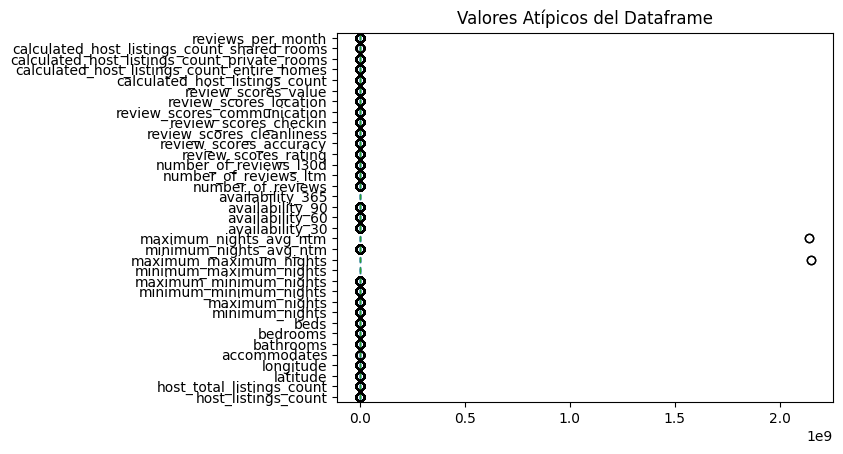

In [13]:
#Obtenemos los limites superior e inferior de todas las variables numericas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
numcol_sinid.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [14]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=numcol_sinid
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                             9.885468e+01
host_total_listings_count                       1.501162e+02
latitude                                        5.241881e+01
longitude                                       4.996959e+00
accommodates                                    7.033283e+00
bathrooms                                       3.032154e+00
bedrooms                                        4.320208e+00
beds                                            6.527505e+00
minimum_nights                                  6.270322e+01
maximum_nights                                  1.623461e+03
minimum_minimum_nights                          5.801519e+01
maximum_minimum_nights                          6.342350e+01
minimum_maximum_nights                          1.837076e+03
maximum_maximum_nights                          9.488261e+07
minimum_nights_avg_ntm                          6.230631e+01
maximum_nights_avg_ntm                          9.466091e+0

In [15]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
numcol_outliers= numcol_sinid[(y<=Limite_Superior)&(y>=Limite_Inferior)]
numcol_outliers

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,3.0,52.359310,4.898440,4.0,1.5,2.0,2.0,4.0,21,...,4.63,4.84,4.88,4.91,4.66,3.0,2.0,1.0,0.0,0.22
1,2.0,2.0,52.391850,4.886900,NaN,1.5,NaN,2.0,2.0,30,...,4.69,4.86,4.88,4.58,4.48,2.0,2.0,0.0,0.0,0.72
2,3.0,3.0,52.358710,4.896160,2.0,1.0,1.0,0.0,3.0,21,...,5.00,5.00,5.00,5.00,5.00,3.0,2.0,1.0,0.0,0.04
3,3.0,3.0,52.359720,4.897500,2.0,1.0,1.0,0.0,3.0,10,...,4.69,4.94,4.92,4.92,4.64,3.0,2.0,1.0,0.0,0.29
4,1.0,1.0,52.371040,4.877130,2.0,1.0,1.0,0.0,5.0,15,...,4.81,4.90,4.92,4.94,4.61,1.0,1.0,0.0,0.0,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,1.0,1.0,52.363077,4.856098,2.0,1.0,1.0,1.0,1.0,30,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9306,1.0,1.0,52.361953,4.861518,2.0,1.0,1.0,1.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9307,1.0,1.0,52.417498,4.884009,3.0,1.0,1.0,1.0,3.0,12,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9308,1.0,1.0,52.368450,4.882472,2.0,1.0,1.0,1.0,3.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00


In [16]:
#Comprobamos los valores atipicos que se volvieron nulos 
numcol_outliers.isnull().sum()

host_listings_count                              32
host_total_listings_count                        32
latitude                                        131
longitude                                       114
accommodates                                     79
bathrooms                                        95
bedrooms                                         71
beds                                             59
minimum_nights                                   41
maximum_nights                                    0
minimum_minimum_nights                           32
maximum_minimum_nights                           40
minimum_maximum_nights                            0
maximum_maximum_nights                            2
minimum_nights_avg_ntm                           40
maximum_nights_avg_ntm                            2
availability_30                                 318
availability_60                                  76
availability_90                                   0
availability

In [17]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
numcol_clean=numcol_outliers.copy()
numcol_clean=numcol_clean.fillna(round(numcol_outliers.mean(),1))
numcol_clean

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,3.0,52.359310,4.898440,4.0,1.5,2.0,2.0,4.0,21,...,4.63,4.84,4.88,4.91,4.66,3.0,2.0,1.0,0.0,0.22
1,2.0,2.0,52.391850,4.886900,2.9,1.5,1.5,2.0,2.0,30,...,4.69,4.86,4.88,4.58,4.48,2.0,2.0,0.0,0.0,0.72
2,3.0,3.0,52.358710,4.896160,2.0,1.0,1.0,0.0,3.0,21,...,5.00,5.00,5.00,5.00,5.00,3.0,2.0,1.0,0.0,0.04
3,3.0,3.0,52.359720,4.897500,2.0,1.0,1.0,0.0,3.0,10,...,4.69,4.94,4.92,4.92,4.64,3.0,2.0,1.0,0.0,0.29
4,1.0,1.0,52.371040,4.877130,2.0,1.0,1.0,0.0,5.0,15,...,4.81,4.90,4.92,4.94,4.61,1.0,1.0,0.0,0.0,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,1.0,1.0,52.363077,4.856098,2.0,1.0,1.0,1.0,1.0,30,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9306,1.0,1.0,52.361953,4.861518,2.0,1.0,1.0,1.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9307,1.0,1.0,52.417498,4.884009,3.0,1.0,1.0,1.0,3.0,12,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
9308,1.0,1.0,52.368450,4.882472,2.0,1.0,1.0,1.0,3.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00


In [18]:
#Corroboramos valores nulos del dataframe LIMPIO
numcol_clean.isnull().sum().sum()

0

In [19]:
freq_tbl(catcol)
catcol.columns

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour       4753    0.510526         0.510526
1  within a few hours       2413    0.259184         0.769710
2        within a day       1835    0.197100         0.966810
3  a few days or more        309    0.033190         1.000000

----------------------------------------------------------------

   host_acceptance_rate  frequency  percentage  cumulative_perc
0                  100%       3133    0.336520         0.336520
1                    0%        455    0.048872         0.385392
2                   50%        397    0.042642         0.428034
3                   99%        377    0.040494         0.468528
4                   67%        282    0.030290         0.498818
..                  ...        ...         ...              ...
95                   9%          7    0.000752         0.998067
96                  12%          6    0.000644         0.998711
97                  66%          5    0.000537 

Index(['host_response_time', 'host_acceptance_rate', 'property_type',
       'room_type', 'amenities', 'host_is_superhost'],
      dtype='object')

In [20]:
# Limitar numero máximo de filas
pd.options.display.max_rows = None

In [21]:
#Obtenemos un análisis univariado de las diferentes variables
table1= freq_tbl(catcol['amenities'])
table2= freq_tbl(catcol['host_acceptance_rate'])
table3= freq_tbl(catcol['host_is_superhost'])
table4= freq_tbl(catcol['host_response_time'])
table5= freq_tbl(catcol['property_type'])
table6= freq_tbl(catcol['room_type'])
table1
table2
table3
table4
table5
table6

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,7436,0.798711,0.798711
1,Private room,1783,0.191515,0.990226
2,Hotel room,49,0.005263,0.995489
3,Shared room,42,0.004511,1.000000


In [22]:
table1.amenities = table1.amenities.replace({'["Smoke alarm", "Washer", "Wifi", "TV", "Kitchen"]':'Amenidades 1'}, regex=False)
table1.amenities = table1.amenities.replace({'["Iron", "Paid parking on premises", "Air conditioning", "Smoke alarm", "Dedicated workspace", "Luggage dropoff allowed", "Wifi", "Hot water", "Essentials", "Heating", "Shampoo", "TV"]':'Amenidades 2'}, regex=False)
#table1.amenities = table1.amenities.replace({'["Iron", "Shampoo", "Hot water kettle", "Exterior security cameras on property", "Paid parking off premises", "Extra pillows and blankets", "Shower gel", "Paid washer \u2013 In building", "Body soap", "Paid dryer \u2013 In building", "Hangers", "Dedicated workspace", "First aid kit", "Host greets you", "Bed linens", "TV", "Conditioner", "Breakfast", "Mini fridge", "Luggage dropoff allowed", "Safe", "Waterfront", "Portable fans", "Hair dryer", "Smoke alarm", "Clothing storage", "Refrigerator", "Shared patio or balcony", "Wifi", "Hot water", "Coffee maker", "Essentials", "Heating", "Fire extinguisher"]':'Amenidades 3'}, regex=False)
table1.amenities = table1.amenities.replace({'["Iron", "Shampoo", "Paid parking on premises", "Extra pillows and blankets", "Stove", "Hangers", "Dedicated workspace", "Carbon monoxide alarm", "First aid kit", "Self check-in", "Bed linens", "TV", "Microwave", "Washer", "Luggage dropoff allowed", "Oven", "Cooking basics", "Dishwasher", "Air conditioning", "Smoke alarm", "Dryer", "Wifi", "Hot water", "Coffee maker", "Essentials", "Heating", "Fire extinguisher", "Building staff", "Gym", "Dishes and silverware", "Kitchen"]':'Amenidades 4'}, regex=False)


In [23]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro= table1[table1['frequency']>7]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index1= Filtro.set_index('amenities')
Filtro_index1
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

,frequency
amenities,
Amenidades 1,17
Amenidades 2,10
"[""Iron"", ""Shampoo"", ""Hot water kettle"", ""Exterior security cameras on property"", ""Paid parking off premises"", ""Extra pillows and blankets"", ""Shower gel"", ""Paid washer \u2013 In building"", ""Body soap"", ""Paid dryer \u2013 In building"", ""Hangers"", ""Dedicated workspace"", ""First aid kit"", ""Host greets you"", ""Bed linens"", ""TV"", ""Conditioner"", ""Breakfast"", ""Mini fridge"", ""Luggage dropoff allowed"", ""Safe"", ""Waterfront"", ""Portable fans"", ""Hair dryer"", ""Smoke alarm"", ""Clothing storage"", ""Refrigerator"", ""Shared patio or balcony"", ""Wifi"", ""Hot water"", ""Coffee maker"", ""Essentials"", ""Heating"", ""Fire extinguisher""]",8
Amenidades 4,8


Text(0, 0.5, 'Frecuencia')

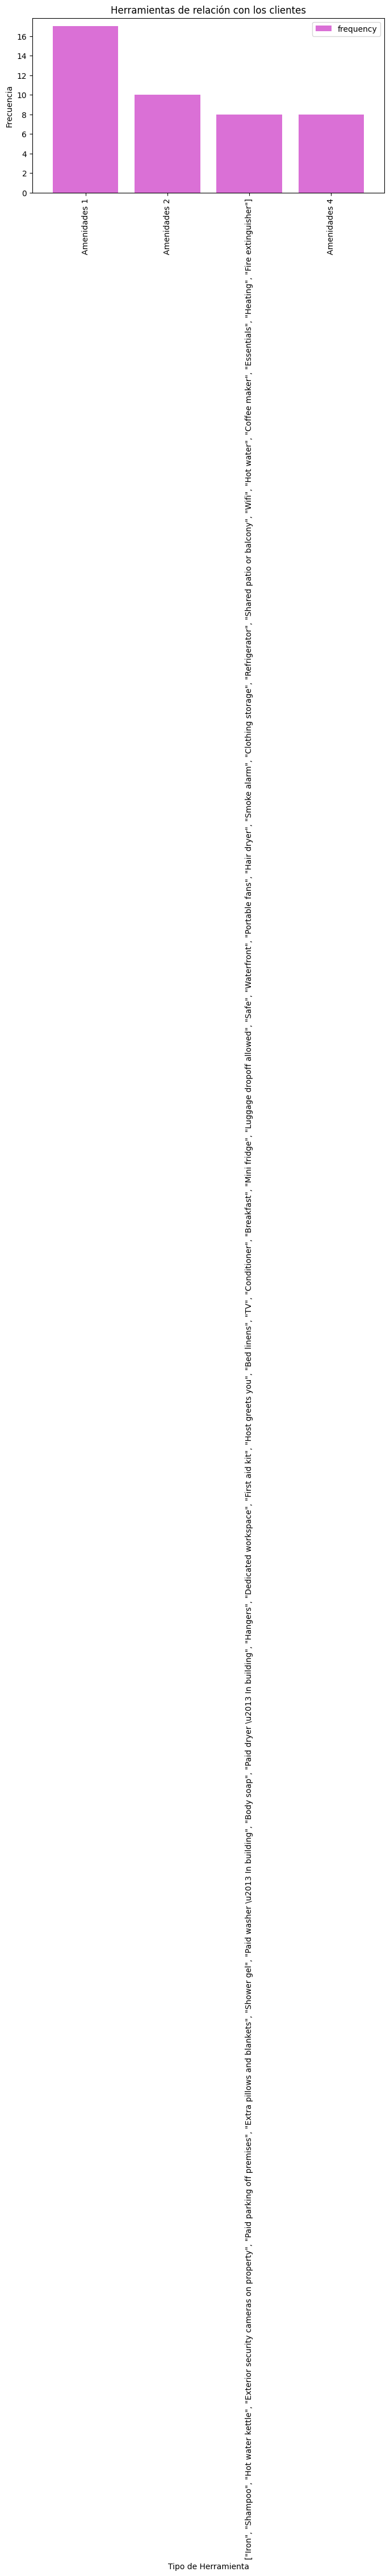

In [24]:
Filtro_index_frequency1.plot(kind = 'bar', width=0.8, figsize=(8,4),color='orchid')
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [25]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada porcentaje de aceptacion de arrendador

Filtro= table2[table2['frequency']>281]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index2= Filtro.set_index('host_acceptance_rate')
Filtro_index2
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency2= Filtro_index2.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency2

,frequency
host_acceptance_rate,
100%,3133
0%,455
50%,397
99%,377
67%,282


<Axes: ylabel='frequency'>

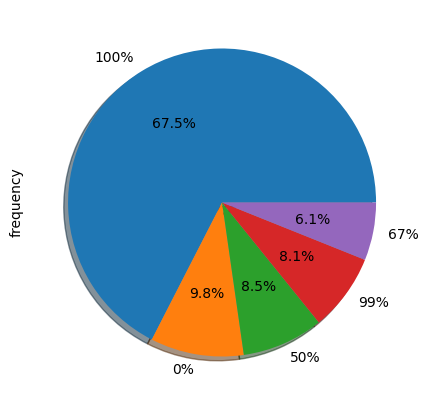

In [26]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")


In [27]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro= table3[table3['frequency']>7]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index3= Filtro.set_index('host_is_superhost')
Filtro_index3
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency3= Filtro_index3.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency3

,frequency
host_is_superhost,
f,7697
t,1613


Text(0, 0.5, 'Frecuencia')

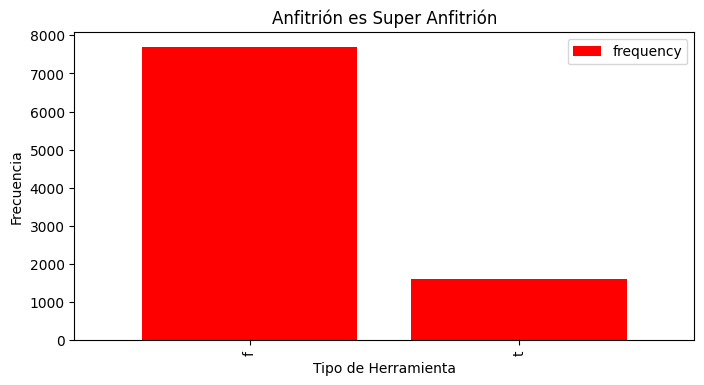

In [28]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency3.plot(kind = 'bar', width=0.8, figsize=(8,4),color='red')
plt.title('Anfitrión es Super Anfitrión')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [29]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro= table4[table4['frequency']>1]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index4= Filtro.set_index('host_response_time')
Filtro_index4
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency4= Filtro_index4.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency4

,frequency
host_response_time,
within an hour,4753
within a few hours,2413
within a day,1835
a few days or more,309


<Axes: xlabel='host_response_time'>

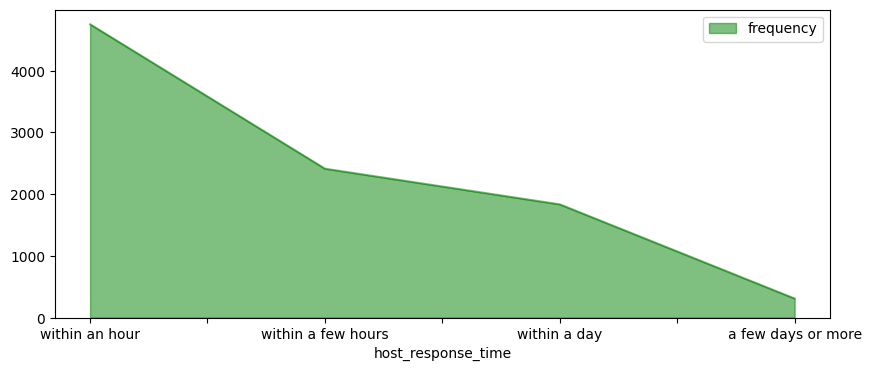

In [30]:

#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency4.plot(kind='area', figsize=(10,4),alpha = 0.5,color='green')

In [31]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro= table5[table5['frequency']>100]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index5= Filtro.set_index('property_type')
Filtro_index5
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency5= Filtro_index5.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency5

,frequency
property_type,
Entire rental unit,3894
Entire condo,1650
Entire home,924
Private room in rental unit,433
Private room in bed and breakfast,329
Entire townhouse,235
Entire loft,227
Room in hotel,183
Private room in condo,176


Text(0, 0.5, 'Frecuencia')

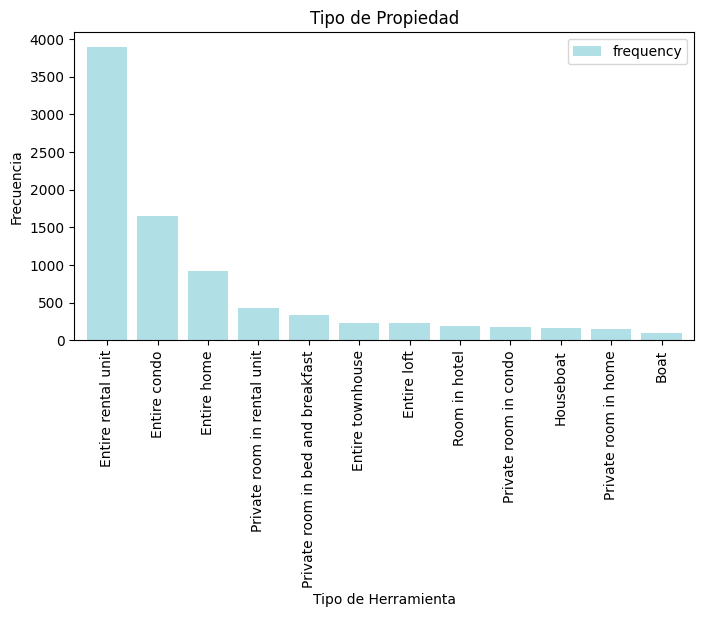

In [32]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency5.plot(kind = 'bar', width=0.8, figsize=(8,4),color='powderblue')
plt.title('Tipo de Propiedad')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')


In [33]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro= table6[table6['frequency']>1]
Filtro
#Ajustamos el indice de mi dataframe
Filtro_index6= Filtro.set_index('room_type')
Filtro_index6
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency6= Filtro_index6.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency6

,frequency
room_type,
Entire home/apt,7436
Private room,1783
Hotel room,49
Shared room,42


<Axes: xlabel='room_type'>

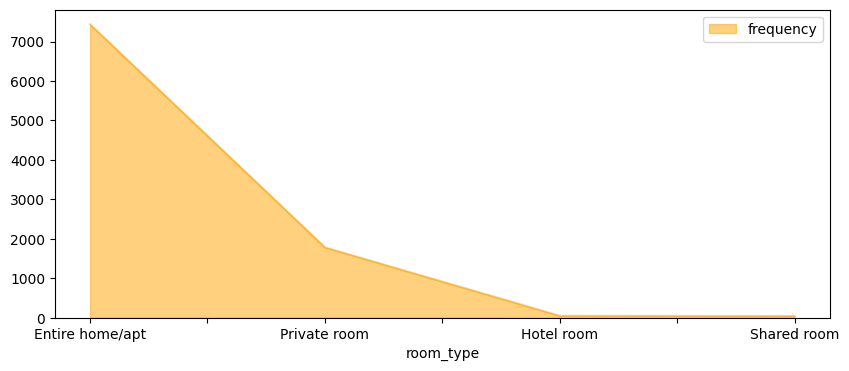

In [34]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency6.plot(kind='area', figsize=(10,4),alpha = 0.5,color="orange")

In [35]:
# Unimos los otros data frame para ver que esten limpios

dfa_limpio = pd.concat([numcol_clean,numcol,catcol], axis=1)
dfa_limpio.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_acceptance_rate,property_type,room_type,amenities,host_is_superhost
0,3.0,3.0,52.35931,4.89844,4.0,1.5,2.0,2.0,4.0,21,...,2,1,0,0.22,a few days or more,86%,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Iron"", ""Microwave"", ""Smoke ala...",f
1,2.0,2.0,52.39185,4.88690,2.9,1.5,1.5,2.0,2.0,30,...,2,0,0,0.72,a few days or more,86%,Boat,Entire home/apt,"[""Patio or balcony"", ""Pets allowed"", ""Stove"", ...",t
2,3.0,3.0,52.35871,4.89616,2.0,1.0,1.0,0.0,3.0,21,...,2,1,0,0.04,a few days or more,86%,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Iron"", ""High chair"", ""Smoke al...",f


In [36]:
dfa_limpio.isnull().sum().sum()

0

***Procedemos a trabajar con Porto***

In [37]:
dfp.head(5)
dfp.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [38]:
#Se eliminan los valores nulos
dfp.isnull().sum()
dfp=dfp.fillna(method='ffill')
dfp=dfp.fillna(method='bfill')

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/155373745.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfp=dfp.fillna(method='ffill')
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/155373745.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfp=dfp.fillna(method='bfill')


In [39]:
#Como no funciono el bfill y ffill usamos el metodo de sustituir por una palabra 
dfp1=dfp.fillna('nulos')
dfp1.info()
dfp1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14251 non-null  int64  
 1   listing_url                                   14251 non-null  object 
 2   scrape_id                                     14251 non-null  int64  
 3   last_scraped                                  14251 non-null  object 
 4   source                                        14251 non-null  object 
 5   name                                          14251 non-null  object 
 6   description                                   14251 non-null  object 
 7   neighborhood_overview                         14251 non-null  object 
 8   picture_url                                   14251 non-null  object 
 9   host_id                                       14251 non-null 

0

In [40]:
#Se separan las columnas por cualitativas y cuantitativas
numcolp=dfp1.select_dtypes(include=['number'])
catcolsinfiltrarp=dfp1.select_dtypes(include=['object'])

In [41]:
#Se seleccionan las variables solicitadas 
catcolp=catcolsinfiltrarp[['host_response_time','host_acceptance_rate','property_type','room_type','amenities','host_is_superhost']]

In [42]:
#Se procesan los datos nulos de las varibales numericas 
numcolp.isnull().sum().sum()
numcolp=numcolp.fillna(method='ffill')
numcolp=numcolp.fillna(method='bfill')

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/1480620889.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcolp=numcolp.fillna(method='ffill')
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_28247/1480620889.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcolp=numcolp.fillna(method='bfill')


In [43]:
#Comprobamos los valores faltantes nuevamente 
numcolp.isnull().sum().sum()

0

In [44]:
numcolp_sinid=numcolp.drop(['id','host_id','scrape_id'],axis=1)

<Figure size 1500x800 with 0 Axes>

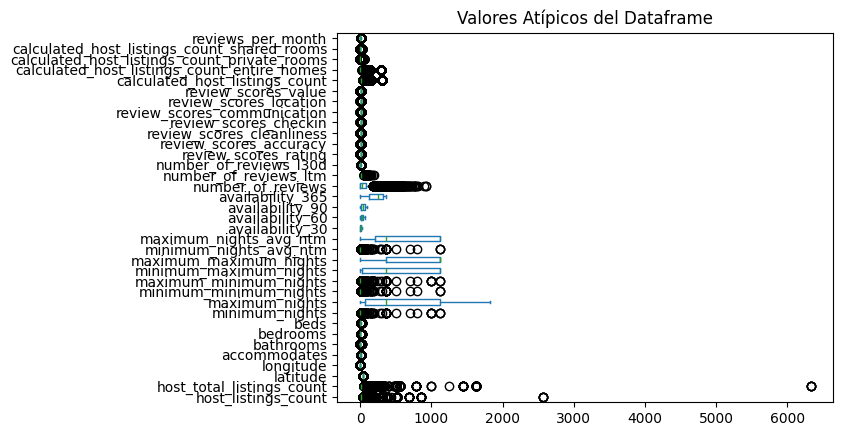

In [45]:
#Obtenemos los limites superior e inferior de todas las variables numericas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
numcolp_sinid.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [46]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=numcolp_sinid
Limite_Superiorp= y.mean() + 3*y.std()
Limite_Inferiorp= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                             9.885468e+01
host_total_listings_count                       1.501162e+02
latitude                                        5.241881e+01
longitude                                       4.996959e+00
accommodates                                    7.033283e+00
bathrooms                                       3.032154e+00
bedrooms                                        4.320208e+00
beds                                            6.527505e+00
minimum_nights                                  6.270322e+01
maximum_nights                                  1.623461e+03
minimum_minimum_nights                          5.801519e+01
maximum_minimum_nights                          6.342350e+01
minimum_maximum_nights                          1.837076e+03
maximum_maximum_nights                          9.488261e+07
minimum_nights_avg_ntm                          6.230631e+01
maximum_nights_avg_ntm                          9.466091e+0

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
pnumcol_outliers= numcolp_sinid[(y<=Limite_Superiorp)&(y>=Limite_Inferiorp)]
pnumcol_outliers

In [48]:
#Comprobamos los valores atipicos que se volvieron nulos 
pnumcol_outliers.isnull().sum()

host_listings_count                             481
host_total_listings_count                        86
latitude                                        694
longitude                                       322
accommodates                                    168
bathrooms                                       300
bedrooms                                        122
beds                                            248
minimum_nights                                   41
maximum_nights                                    0
minimum_minimum_nights                           40
maximum_minimum_nights                          168
minimum_maximum_nights                            0
maximum_maximum_nights                            0
minimum_nights_avg_ntm                           50
maximum_nights_avg_ntm                            0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
pnumcol_clean=pnumcol_outliers.copy()
pnumcol_clean=pnumcol_clean.fillna(round(pnumcol_outliers.mean(),1))
pnumcol_clean

In [50]:
#Corroboramos valores nulos del dataframe LIMPIO
pnumcol_clean.isnull().sum().sum()

0

In [51]:
freq_tbl(catcolp)
catcolp.columns

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      12952    0.908849         0.908849
1  within a few hours        681    0.047786         0.956635
2        within a day        393    0.027577         0.984212
3  a few days or more        225    0.015788         1.000000

----------------------------------------------------------------

   host_acceptance_rate  frequency  percentage  cumulative_perc
0                  100%       9584    0.672514         0.672514
1                   99%       1079    0.075714         0.748228
2                   98%        688    0.048277         0.796506
3                   97%        355    0.024911         0.821416
4                   95%        255    0.017893         0.839310
5                    0%        209    0.014666         0.853975
6                   96%        196    0.013753         0.867729
7                   94%        138    0.009684         0.877412
8                   90%        123    0.008631 

Index(['host_response_time', 'host_acceptance_rate', 'property_type',
       'room_type', 'amenities', 'host_is_superhost'],
      dtype='object')

In [52]:
# Limitar numero máximo de filas
pd.options.display.max_rows = None

In [53]:
#Obtenemos un análisis univariado de las diferentes variables
table1p= freq_tbl(catcolp['amenities'])
table2p= freq_tbl(catcolp['host_acceptance_rate'])
table3p= freq_tbl(catcolp['host_is_superhost'])
table4p= freq_tbl(catcolp['host_response_time'])
table5p= freq_tbl(catcolp['property_type'])
table6p= freq_tbl(catcolp['room_type'])
table1p
table2p
table3p
table4p
table5p
table6p

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,11410,0.800646,0.800646
1,Private room,2442,0.171356,0.972002
2,Shared room,292,0.020490,0.992492
3,Hotel room,107,0.007508,1.000000


In [54]:
table1p.amenities = table1p.amenities.replace({'["Hair dryer", "Kitchen", "Free parking on premises", "Outdoor dining area", "Wifi", "Dedicated workspace", "Washer", "Smoke alarm", "BBQ grill", "TV", "Heating", "Fire extinguisher", "Cooking basics", "First aid kit", "Carbon monoxide alarm"]':'Amenidades 2'}, regex=False)
table1p.amenities = table1p.amenities.replace({'["Hair dryer", "Essentials", "Kitchen", "Outdoor dining area", "Wifi", "Dedicated workspace", "Smoke alarm", "Iron", "TV", "Exterior security cameras on property", "Hangers", "Air conditioning", "Heating", "Fire extinguisher", "First aid kit", "Long term stays allowed", "Carbon monoxide alarm", "Hot water", "Luggage dropoff allowed"]':'Amenidades 2'}, regex=False)
table1p.amenities = table1p.amenities.replace({'["Lockbox", "Fire extinguisher", "First aid kit", "Refrigerator", "Dishes and silverware", "Hot water kettle", "TV", "Stove", "Kitchen", "Essentials", "Microwave", "Shampoo", "Cooking basics", "Coffee maker", "Wifi", "Hair dryer", "Hangers", "Air conditioning", "Long term stays allowed", "Hot water", "Self check-in"]':'Amenidades 3'}, regex=False)


In [55]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtrop= table1p[table1p['frequency']>17]
Filtrop
#Ajustamos el indice de mi dataframe
Filtro_index1p= Filtrop.set_index('amenities')
Filtro_index1p
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency1p= Filtro_index1p.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1p

,frequency
amenities,
[],132
Amenidades 2,27
Amenidades 2,21
Amenidades 3,20


Text(0, 0.5, 'Frecuencia')

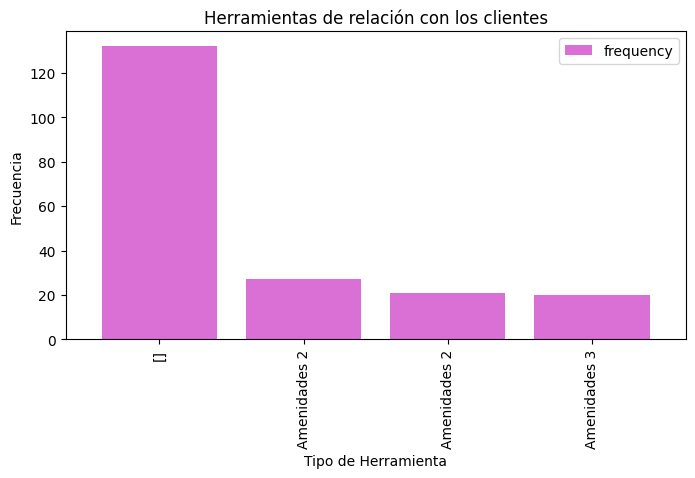

In [56]:
Filtro_index_frequency1p.plot(kind = 'bar', width=0.8, figsize=(8,4),color='orchid')
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [57]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada porcentaje de aceptacion de arrendador

Filtro10= table2p[table2p['frequency']>281]
Filtro10
#Ajustamos el indice de mi dataframe
Filtro_index20= Filtro10.set_index('host_acceptance_rate')
Filtro_index20
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency20= Filtro_index20.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency20

,frequency
host_acceptance_rate,
100%,9584
99%,1079
98%,688
97%,355


<Axes: ylabel='frequency'>

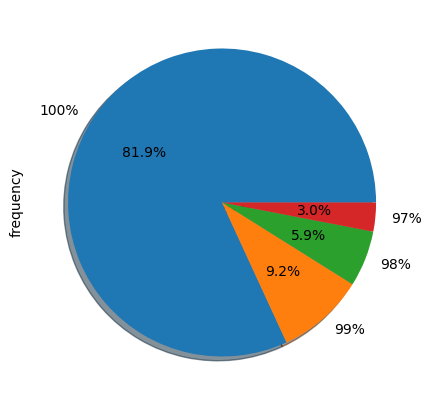

In [58]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index20["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")


In [60]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro20= table3p[table3p['frequency']>7]
Filtro20
#Ajustamos el indice de mi dataframe
Filtro_index30= Filtro20.set_index('host_is_superhost')
Filtro_index30
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency30= Filtro_index30.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency30

,frequency
host_is_superhost,
f,9262
t,4989


Text(0, 0.5, 'Frecuencia')

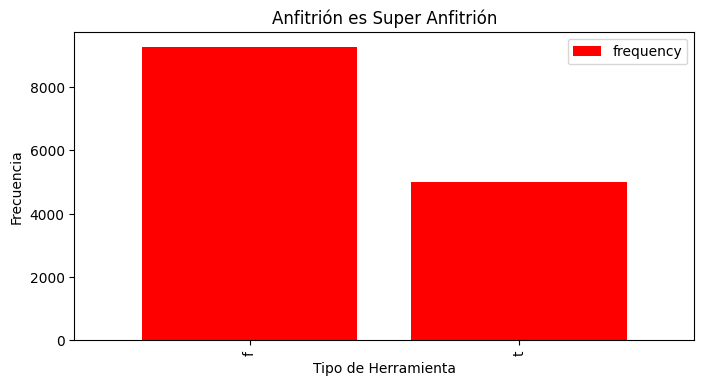

In [61]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency30.plot(kind = 'bar', width=0.8, figsize=(8,4),color='red')
plt.title('Anfitrión es Super Anfitrión')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [64]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro03= table4p[table4p['frequency']>1]
Filtro03
#Ajustamos el indice de mi dataframe
Filtro_index40= Filtro03.set_index('host_response_time')
Filtro_index40
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency40= Filtro_index40.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency40

,frequency
host_response_time,
within an hour,12952
within a few hours,681
within a day,393
a few days or more,225


<Axes: xlabel='host_response_time'>

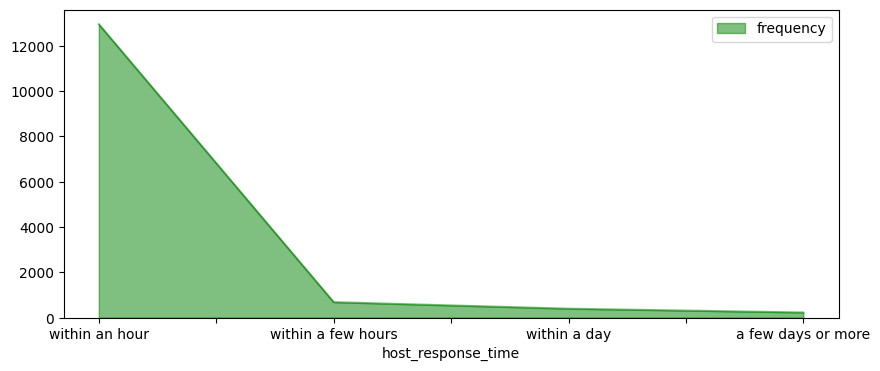

In [65]:

#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency40.plot(kind='area', figsize=(10,4),alpha = 0.5,color='green')


In [66]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro04= table5p[table5p['frequency']>100]
Filtro04
#Ajustamos el indice de mi dataframe
Filtro_index50= Filtro04.set_index('property_type')
Filtro_index50
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency50= Filtro_index50.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency50

,frequency
property_type,
Entire rental unit,8273
Entire home,1039
Private room in rental unit,912
Entire serviced apartment,592
Private room in home,488
Entire loft,438
Entire condo,370
Private room in guesthouse,200
Room in hotel,162


Text(0, 0.5, 'Frecuencia')

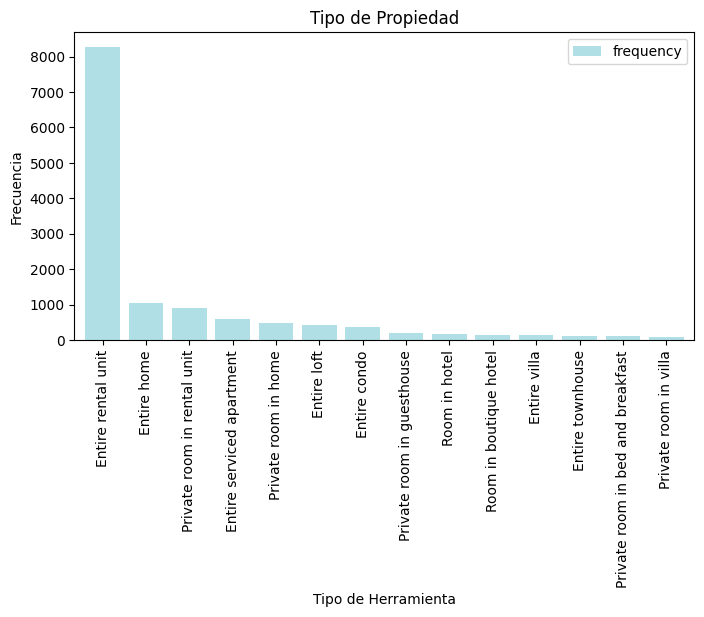

In [67]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency50.plot(kind = 'bar', width=0.8, figsize=(8,4),color='powderblue')
plt.title('Tipo de Propiedad')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')


In [68]:
#Creamos un filtro de los valores más reelevantes de la variables categórica seleccionada

Filtro05= table6p[table6p['frequency']>1]
Filtro05
#Ajustamos el indice de mi dataframe
Filtro_index60= Filtro05.set_index('room_type')
Filtro_index60
#Eliminamos las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency60= Filtro_index60.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency60

,frequency
room_type,
Entire home/apt,11410
Private room,2442
Shared room,292
Hotel room,107


<Axes: xlabel='room_type'>

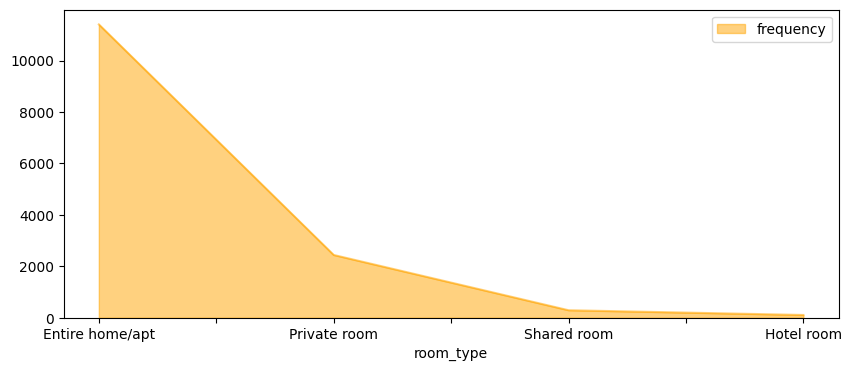

In [69]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency60.plot(kind='area', figsize=(10,4),alpha = 0.5,color="orange")

In [70]:
# Unimos los otros data frame para ver que esten limpios
dfp_limpio = pd.concat([pnumcol_clean,numcolp,catcolp], axis=1)
dfp_limpio.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_acceptance_rate,property_type,room_type,amenities,host_is_superhost
0,1.0,1.0,41.33145,-8.73664,6.0,2.0,3.0,5.0,2.0,1125,...,1,0,0,0.85,within an hour,71%,Entire rental unit,Entire home/apt,"[""Oven"", ""Fast wifi \u2013 114 Mbps"", ""Heating...",f
1,1.0,3.0,41.11544,-8.65838,2.0,1.0,1.0,1.0,3.0,365,...,1,0,0,0.18,within an hour,100%,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Free parking on premises"", ""Outdo...",f
2,8.0,11.0,41.14835,-8.60907,4.0,1.0,1.0,2.0,1.0,1125,...,1,7,0,2.59,within an hour,100%,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Essentials"", ""Microwave"", ""Mini f...",f


In [71]:
dfp_limpio.isnull().sum().sum()

0